In [104]:
#!pip install mesa

In [105]:
!ls

Agent.py          Experiments.ipynb Model.py          __pycache__


In [106]:
%load_ext autoreload
%autoreload 2
from Model import DeffuantModel
from Agent import DeffuantAgent
import seaborn as sns
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
my_model = DeffuantModel(n=100, mu=0.5, gen_u=0.5, ext_u=0.05, extremist_ratio=0.2, d=0.2,  regime="all")
my_model.step()
for i in range(1,500):
    my_model.step()
    norm = np.linalg.norm(my_model.datacollector.get_agent_vars_dataframe().loc[i,:,:].to_numpy() - \
                          my_model.datacollector.get_agent_vars_dataframe().loc[i-1,:,:].to_numpy())
    if norm < 0.0001:
        print('Convergence on {} step'.format(i+2))
        break

Convergence on 217 step


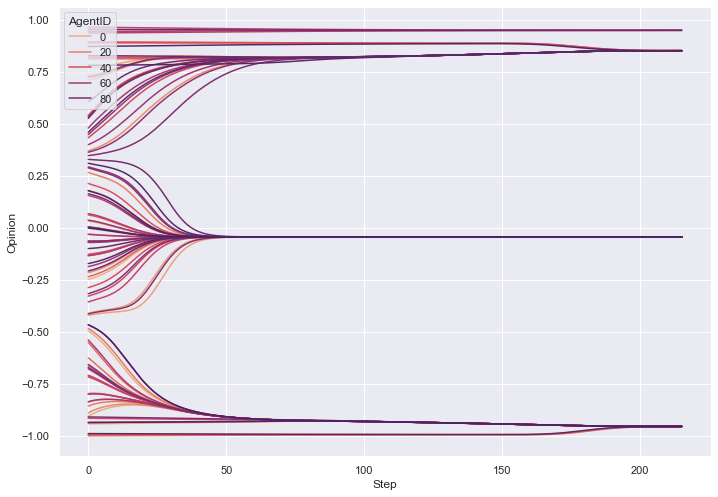

In [112]:
opinions = my_model.datacollector.get_agent_vars_dataframe().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=opinions, x='Step', y='Opinion', hue='AgentID', palette="flare");